In [1]:
#import the libraries
import time
import pandas as pd
import numpy as np
import torch as torch  
from sklearn.model_selection import train_test_split
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
#import syft as sy
#from torch.utils import data
#from syft.frameworks.torch.federated import utils
#from syft.workers import WebsocketClientWorker
#from syft.workers import VirtualWorker
 
LOCATION_OF_DATA_FOR_TRAINING = 'time_taken_home_to_office - data.csv'

In [2]:
X = pd.read_csv(LOCATION_OF_DATA_FOR_TRAINING, header=0, usecols=['day','start_time', 'is_any_road_blocked_in_between', 'mode_of_transport'])
 
# transform all coloumns in X to numerical data and one-hot encode
# We don't need feature scaling as the code below takes care of it as well
X = pd.get_dummies(X, columns=['day','start_time', 'is_any_road_blocked_in_between', 'mode_of_transport']).values
 
Y = pd.read_csv(LOCATION_OF_DATA_FOR_TRAINING, header=0, usecols=['time_taken']).values
 
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
 
# get number of columns in training data
# which means how many variables you have for training
n_cols = X_train.shape[1]

In [3]:
# -----------------------------------------------------------------------------
# Class for making the Neural Network
 
# Make a regressor with three hidden layers
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(n_cols, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 1)
 
        #self.dropout = nn.Dropout(p=0.1)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
 
        return x

In [4]:
#some federated learning there in future
#hook = sy.TorchHook(torch)
#alice = sy.VirtualWorker(hook, id="alice")
#bob = sy.VirtualWorker(hook, id="bob") 

In [4]:
# -----------------------------------------------------------------------------
# Let's train the model
    
train_batch = np.array_split(X_train, 10)
label_batch = np.array_split(y_train, 10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
 
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i]).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i]).float().view(-1, 1)
 
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float().view(-1, 1)
 
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=.01)
epochs = 300
 
train_losses, test_losses = [], []


def train(model, device, optimizer, epoch):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(torch.log(output), torch.log(label_batch[i])))
        loss.backward()
        optimizer.step()        
        train_loss += loss.item()
        train_losses.append(train_loss/len(train_batch))
        print("Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)))
          


def test(model, device):
    test_loss = 0
    accuracy = 0
    
    with torch.no_grad():
        model.eval()
        predictions = model(X_test)
        test_loss += torch.sqrt(criterion(torch.log(predictions), torch.log(y_test)))       
        
        test_losses.append(test_loss)
    print("Model Accuracy: {:.3f}.. ".format((1-test_loss)*100))
        

for epoch in range(epochs):
    train(model, device, optimizer, epoch)
    test(model, device)
    print("Epoch: {}/{}.. ".format(epoch+1, epochs))
        


        
 
       

Training Loss: 0.512.. 
Training Loss: 1.014.. 
Training Loss: 1.481.. 
Training Loss: 1.950.. 
Training Loss: 2.416.. 
Training Loss: 2.865.. 
Training Loss: 3.320.. 
Training Loss: 3.764.. 
Training Loss: 4.206.. 
Training Loss: 4.623.. 
Model Accuracy: -328.139.. 
Epoch: 1/300.. 
Training Loss: 0.424.. 
Training Loss: 0.855.. 
Training Loss: 1.262.. 
Training Loss: 1.678.. 
Training Loss: 2.096.. 
Training Loss: 2.502.. 
Training Loss: 2.917.. 
Training Loss: 3.324.. 
Training Loss: 3.733.. 
Training Loss: 4.117.. 
Model Accuracy: -297.970.. 
Epoch: 2/300.. 
Training Loss: 0.393.. 
Training Loss: 0.796.. 
Training Loss: 1.176.. 
Training Loss: 1.566.. 
Training Loss: 1.960.. 
Training Loss: 2.343.. 
Training Loss: 2.735.. 
Training Loss: 3.121.. 
Training Loss: 3.508.. 
Training Loss: 3.873.. 
Model Accuracy: -278.580.. 
Epoch: 3/300.. 
Training Loss: 0.374.. 
Training Loss: 0.758.. 
Training Loss: 1.120.. 
Training Loss: 1.492.. 
Training Loss: 1.869.. 
Training Loss: 2.235.. 
Trai

Training Loss: 1.658.. 
Training Loss: 1.825.. 
Model Accuracy: -81.869.. 
Epoch: 38/300.. 
Training Loss: 0.175.. 
Training Loss: 0.364.. 
Training Loss: 0.532.. 
Training Loss: 0.711.. 
Training Loss: 0.895.. 
Training Loss: 1.071.. 
Training Loss: 1.257.. 
Training Loss: 1.437.. 
Training Loss: 1.621.. 
Training Loss: 1.783.. 
Model Accuracy: -77.682.. 
Epoch: 39/300.. 
Training Loss: 0.171.. 
Training Loss: 0.355.. 
Training Loss: 0.519.. 
Training Loss: 0.694.. 
Training Loss: 0.874.. 
Training Loss: 1.046.. 
Training Loss: 1.227.. 
Training Loss: 1.403.. 
Training Loss: 1.583.. 
Training Loss: 1.741.. 
Model Accuracy: -73.460.. 
Epoch: 40/300.. 
Training Loss: 0.167.. 
Training Loss: 0.347.. 
Training Loss: 0.507.. 
Training Loss: 0.677.. 
Training Loss: 0.852.. 
Training Loss: 1.020.. 
Training Loss: 1.198.. 
Training Loss: 1.369.. 
Training Loss: 1.544.. 
Training Loss: 1.698.. 
Model Accuracy: -69.200.. 
Epoch: 41/300.. 
Training Loss: 0.162.. 
Training Loss: 0.338.. 
Training

Model Accuracy: 73.356.. 
Epoch: 76/300.. 
Training Loss: 0.016.. 
Training Loss: 0.049.. 
Training Loss: 0.071.. 
Training Loss: 0.090.. 
Training Loss: 0.113.. 
Training Loss: 0.143.. 
Training Loss: 0.168.. 
Training Loss: 0.190.. 
Training Loss: 0.222.. 
Training Loss: 0.251.. 
Model Accuracy: 74.018.. 
Epoch: 77/300.. 
Training Loss: 0.016.. 
Training Loss: 0.048.. 
Training Loss: 0.070.. 
Training Loss: 0.088.. 
Training Loss: 0.110.. 
Training Loss: 0.140.. 
Training Loss: 0.164.. 
Training Loss: 0.185.. 
Training Loss: 0.217.. 
Training Loss: 0.245.. 
Model Accuracy: 74.513.. 
Epoch: 78/300.. 
Training Loss: 0.015.. 
Training Loss: 0.047.. 
Training Loss: 0.069.. 
Training Loss: 0.087.. 
Training Loss: 0.108.. 
Training Loss: 0.138.. 
Training Loss: 0.161.. 
Training Loss: 0.181.. 
Training Loss: 0.213.. 
Training Loss: 0.242.. 
Model Accuracy: 74.886.. 
Epoch: 79/300.. 
Training Loss: 0.015.. 
Training Loss: 0.046.. 
Training Loss: 0.069.. 
Training Loss: 0.086.. 
Training Los

Training Loss: 0.178.. 
Training Loss: 0.205.. 
Model Accuracy: 78.316.. 
Epoch: 115/300.. 
Training Loss: 0.014.. 
Training Loss: 0.040.. 
Training Loss: 0.061.. 
Training Loss: 0.075.. 
Training Loss: 0.093.. 
Training Loss: 0.119.. 
Training Loss: 0.136.. 
Training Loss: 0.152.. 
Training Loss: 0.178.. 
Training Loss: 0.204.. 
Model Accuracy: 78.382.. 
Epoch: 116/300.. 
Training Loss: 0.013.. 
Training Loss: 0.039.. 
Training Loss: 0.061.. 
Training Loss: 0.075.. 
Training Loss: 0.092.. 
Training Loss: 0.119.. 
Training Loss: 0.136.. 
Training Loss: 0.152.. 
Training Loss: 0.177.. 
Training Loss: 0.203.. 
Model Accuracy: 78.447.. 
Epoch: 117/300.. 
Training Loss: 0.013.. 
Training Loss: 0.039.. 
Training Loss: 0.061.. 
Training Loss: 0.074.. 
Training Loss: 0.092.. 
Training Loss: 0.118.. 
Training Loss: 0.136.. 
Training Loss: 0.151.. 
Training Loss: 0.176.. 
Training Loss: 0.203.. 
Model Accuracy: 78.511.. 
Epoch: 118/300.. 
Training Loss: 0.013.. 
Training Loss: 0.039.. 
Training

Training Loss: 0.011.. 
Training Loss: 0.035.. 
Training Loss: 0.054.. 
Training Loss: 0.067.. 
Training Loss: 0.084.. 
Training Loss: 0.107.. 
Training Loss: 0.124.. 
Training Loss: 0.137.. 
Training Loss: 0.158.. 
Training Loss: 0.180.. 
Model Accuracy: 80.534.. 
Epoch: 154/300.. 
Training Loss: 0.011.. 
Training Loss: 0.034.. 
Training Loss: 0.054.. 
Training Loss: 0.067.. 
Training Loss: 0.084.. 
Training Loss: 0.107.. 
Training Loss: 0.124.. 
Training Loss: 0.136.. 
Training Loss: 0.158.. 
Training Loss: 0.180.. 
Model Accuracy: 80.581.. 
Epoch: 155/300.. 
Training Loss: 0.011.. 
Training Loss: 0.034.. 
Training Loss: 0.054.. 
Training Loss: 0.067.. 
Training Loss: 0.084.. 
Training Loss: 0.107.. 
Training Loss: 0.123.. 
Training Loss: 0.136.. 
Training Loss: 0.158.. 
Training Loss: 0.179.. 
Model Accuracy: 80.629.. 
Epoch: 156/300.. 
Training Loss: 0.011.. 
Training Loss: 0.034.. 
Training Loss: 0.054.. 
Training Loss: 0.067.. 
Training Loss: 0.084.. 
Training Loss: 0.107.. 
Trai

Training Loss: 0.147.. 
Training Loss: 0.166.. 
Model Accuracy: 82.007.. 
Epoch: 191/300.. 
Training Loss: 0.010.. 
Training Loss: 0.031.. 
Training Loss: 0.050.. 
Training Loss: 0.064.. 
Training Loss: 0.080.. 
Training Loss: 0.101.. 
Training Loss: 0.117.. 
Training Loss: 0.128.. 
Training Loss: 0.147.. 
Training Loss: 0.166.. 
Model Accuracy: 82.039.. 
Epoch: 192/300.. 
Training Loss: 0.010.. 
Training Loss: 0.031.. 
Training Loss: 0.050.. 
Training Loss: 0.064.. 
Training Loss: 0.080.. 
Training Loss: 0.101.. 
Training Loss: 0.117.. 
Training Loss: 0.128.. 
Training Loss: 0.147.. 
Training Loss: 0.165.. 
Model Accuracy: 82.070.. 
Epoch: 193/300.. 
Training Loss: 0.010.. 
Training Loss: 0.031.. 
Training Loss: 0.050.. 
Training Loss: 0.064.. 
Training Loss: 0.080.. 
Training Loss: 0.101.. 
Training Loss: 0.117.. 
Training Loss: 0.128.. 
Training Loss: 0.147.. 
Training Loss: 0.165.. 
Model Accuracy: 82.101.. 
Epoch: 194/300.. 
Training Loss: 0.010.. 
Training Loss: 0.031.. 
Training

Training Loss: 0.114.. 
Training Loss: 0.125.. 
Training Loss: 0.142.. 
Training Loss: 0.158.. 
Model Accuracy: 82.975.. 
Epoch: 231/300.. 
Training Loss: 0.009.. 
Training Loss: 0.030.. 
Training Loss: 0.048.. 
Training Loss: 0.063.. 
Training Loss: 0.078.. 
Training Loss: 0.098.. 
Training Loss: 0.114.. 
Training Loss: 0.125.. 
Training Loss: 0.142.. 
Training Loss: 0.158.. 
Model Accuracy: 82.992.. 
Epoch: 232/300.. 
Training Loss: 0.009.. 
Training Loss: 0.030.. 
Training Loss: 0.048.. 
Training Loss: 0.063.. 
Training Loss: 0.078.. 
Training Loss: 0.098.. 
Training Loss: 0.114.. 
Training Loss: 0.124.. 
Training Loss: 0.142.. 
Training Loss: 0.157.. 
Model Accuracy: 83.009.. 
Epoch: 233/300.. 
Training Loss: 0.009.. 
Training Loss: 0.030.. 
Training Loss: 0.048.. 
Training Loss: 0.063.. 
Training Loss: 0.078.. 
Training Loss: 0.098.. 
Training Loss: 0.114.. 
Training Loss: 0.124.. 
Training Loss: 0.142.. 
Training Loss: 0.157.. 
Model Accuracy: 83.025.. 
Epoch: 234/300.. 
Training

Training Loss: 0.048.. 
Training Loss: 0.064.. 
Training Loss: 0.078.. 
Training Loss: 0.097.. 
Training Loss: 0.113.. 
Training Loss: 0.124.. 
Training Loss: 0.140.. 
Training Loss: 0.155.. 
Model Accuracy: 83.455.. 
Epoch: 270/300.. 
Training Loss: 0.009.. 
Training Loss: 0.029.. 
Training Loss: 0.047.. 
Training Loss: 0.064.. 
Training Loss: 0.078.. 
Training Loss: 0.097.. 
Training Loss: 0.113.. 
Training Loss: 0.124.. 
Training Loss: 0.140.. 
Training Loss: 0.155.. 
Model Accuracy: 83.463.. 
Epoch: 271/300.. 
Training Loss: 0.009.. 
Training Loss: 0.029.. 
Training Loss: 0.047.. 
Training Loss: 0.064.. 
Training Loss: 0.078.. 
Training Loss: 0.097.. 
Training Loss: 0.113.. 
Training Loss: 0.124.. 
Training Loss: 0.140.. 
Training Loss: 0.154.. 
Model Accuracy: 83.471.. 
Epoch: 272/300.. 
Training Loss: 0.009.. 
Training Loss: 0.029.. 
Training Loss: 0.047.. 
Training Loss: 0.064.. 
Training Loss: 0.078.. 
Training Loss: 0.097.. 
Training Loss: 0.113.. 
Training Loss: 0.124.. 
Trai

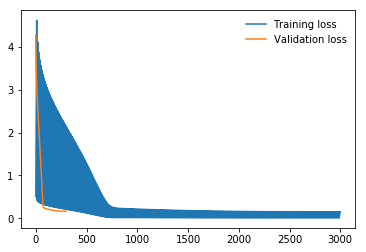

In [5]:
# Plot the loss on graph       
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [6]:
#------------------------------------------------------------------------------    
# let's do the prediction
 
# input for if time is 8.30 AM on Monday
inpt1 = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,1,0]])
# input for if time is 9.00 AM on Monday
inpt2 = np.array([[1,0,0,0,0,0,1,0,0,0,0,0,1,0]])
# input for if time is 9.30 AM on Monday
inpt3 = np.array([[1,0,0,0,0,0,0,1,0,0,0,0,1,0]])
# input for if time is 10.00 AM on Monday
inpt4 = np.array([[1,0,0,0,0,0,0,0,1,0,0,0,1,0]])
# input for if time is 10.30 AM on Monday
inpt5 = np.array([[1,0,0,0,0,0,0,0,0,1,0,0,1,0]])
 
#Convert numpy array to tensor because PyTorch works on Tensors
tensor1 = torch.Tensor(inpt1)
y_pred1 = model(tensor1)
 
tensor2 = torch.Tensor(inpt2)
y_pred2 = model(tensor2)
 
tensor3 = torch.Tensor(inpt3)
y_pred3 = model(tensor3)
 
tensor4 = torch.Tensor(inpt4)
y_pred4 = model(tensor4)
 
tensor5 = torch.Tensor(inpt5)
y_pred5 = model(tensor5)
 
best_time = min(y_pred1,y_pred2,y_pred3,y_pred4, y_pred5)
 
if y_pred1 is best_time:
    print("Best time to start for office on Monday is 8.30 AM, it takes ", best_time[0].item() , ' minutes')
 
elif y_pred2 is best_time:
    print('Best time to start for office on Monday is 9.00 AM, it takes ', best_time[0].item() , ' minutes')
    
elif y_pred3 is best_time:
    print('Best time to start for office on Monday is 9.30 AM, it takes ', best_time[0].item() , ' minutes')
 
elif y_pred4 is best_time:
    print('Best time to start for office on Monday is 10.00 AM, it takes ', best_time[0].item() , ' minutes')
    
elif y_pred5 is best_time:
    print('Best time to start for office on Monday is 10.30 AM, it takes ' , best_time[0].item() , ' minutes')

Best time to start for office on Monday is 10.30 AM, it takes  28.391273498535156  minutes
